In [1]:
include("../../src/JuliaMBD.jl")

Main.JuliaMBD

In [2]:
using DifferentialEquations
using Plots
using CSV
using DataFrames
using LookupTable
using .JuliaMBD
using .JuliaMBD.Diagram

In [3]:
@model test begin
    df = CSV.read("road_surface.csv", DataFrame)
    @block begin
        ramp = Ramp(slope=1)
        b = OneDLookupTable(breaks=df.distance_road_surface, y=df.z_height_road_surface)
    end
    @connect begin
        ramp.out => b.in
    end
    @scope begin
        b.in => x
        b.out => y
    end
end

test (generic function with 1 method)

In [4]:
b = test()
a = JuliaMBD.tsort(JuliaMBD.allcomponents(b))
JuliaMBD.expr_sfunc(b, a)

:(function test_sfunc(; time = 0)
      var"##318" = 0.0
      var"##325" = "LinearPointSlope"
      begin
          var"##320" = time
      end
      var"##323" = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45  …  3599.5, 3599.55, 3599.6, 3599.65, 3599.7, 3599.75, 3599.8, 3599.85, 3599.9, 3599.95]
      var"##327" = "BinarySearch"
      var"##317" = 1
      var"##324" = [0.002337802, 0.006929505, 0.002351349, 0.000465464, 0.000354075, 0.000887611, 0.000748058, 0.000328752, 0.000778706, 0.000730282  …  0.000752394, 0.000373936, 0.000611535, 0.000311205, 0.00075455, 8.1834e-5, 0.000253537, 0.000666529, 0.000874281, 0.000922936]
      var"##319" = 0.0
      var"##326" = "LinearEx"
      var"##316" = var"##320"
      begin
          #= /workspaces/JuliaMBD.jl/src/predefined/Sources/Ramp.jl:24 =#
          var"##315" = if var"##316" < var"##318"
                  #= /workspaces/JuliaMBD.jl/src/predefined/Sources/Ramp.jl:25 =#
                  var"##319"
              else
        

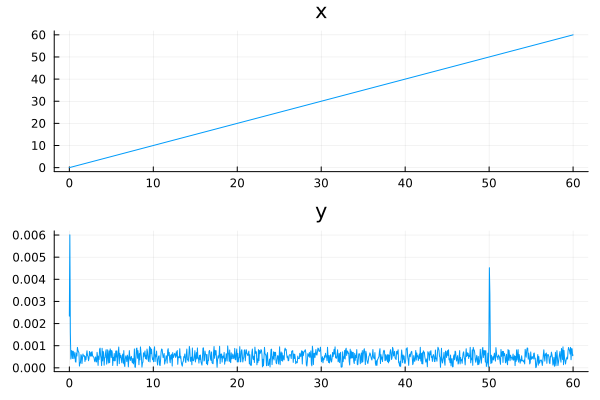

In [5]:
m = @compile test()
result = simulate(m, tspan=(0.0, 60.0))
plot(result)

In [6]:
@model test2 begin
    df = CSV.read("road_surface.csv", DataFrame)
    @xmlmodel("table.drawio")
    @scope begin
        table.in => x
        table.out => y
    end
end

┌ Warning: The port Dict{Any, Any}("label" => "<p style=\"line-height: 100%;\"><br></p>", "name" => "out", "id" => "5", "parent" => "4", "type" => "outport") has not been used.
└ @ Main.JuliaMBD.Diagram /workspaces/JuliaMBD.jl/src/diagrams/_xml2model.jl:76


test2 (generic function with 1 method)

In [9]:
@macroexpand @xmlmodel(:a, "table.drawio")

┌ Warning: The port Dict{Any, Any}("label" => "<p style=\"line-height: 100%;\"><br></p>", "name" => "out", "id" => "5", "parent" => "4", "type" => "outport") has not been used.
└ @ Main.JuliaMBD.Diagram /workspaces/JuliaMBD.jl/src/diagrams/_xml2model.jl:76


quote
    #= /workspaces/JuliaMBD.jl/src/diagrams/_xml2model.jl:159 =#
    begin
        #= none:2 =#
        begin
            #= /workspaces/JuliaMBD.jl/src/_macro.jl:95 =#
            blk0 = Ramp(slope = 1, initialoutput = 0, starttime = 0)
            #= /workspaces/JuliaMBD.jl/src/_macro.jl:96 =#
            JuliaMBD.add!(:a, blk0)
        end
        #= none:3 =#
        begin
            #= /workspaces/JuliaMBD.jl/src/_macro.jl:95 =#
            table = OneDLookupTable(indexsearchmethod = "BinarySearch", extrapmethod = "LinearEx", breaks = df.distance_road_surface, interpmethod = "LinearPointSlope", y = df.z_height_road_surface)
            #= /workspaces/JuliaMBD.jl/src/_macro.jl:96 =#
            JuliaMBD.add!(:a, table)
        end
    end
    #= /workspaces/JuliaMBD.jl/src/diagrams/_xml2model.jl:160 =#
    begin
        #= none:2 =#
        JuliaMBD.LineSignal(JuliaMBD.getport(blk0, :out), JuliaMBD.getport(table, :in))
    end
end

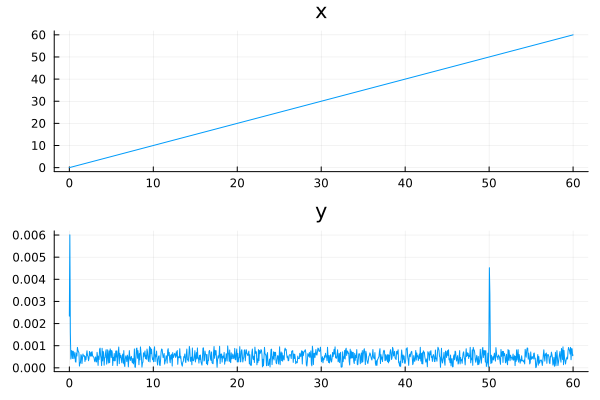

In [7]:
m = @compile test2()
result = simulate(m, tspan=(0.0, 60.0))
plot(result)